[View in Colaboratory](https://colab.research.google.com/github/BikashShaw/MLPractice/blob/master/keras_boston_housing.ipynb)

Loading the Boston housing dataset

In [0]:
from tensorflow.python.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Normalizing the data - subtract the mean of the feature and divide by the standard deviation

In [0]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

Model definition

In [0]:
from tensorflow.python.keras import models
from tensorflow.python.keras import layers

def build_model():
  model = models.Sequential()
  
  model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

K-fold validation

In [0]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

Saving the validation logs at each fold

In [21]:
num_epochs = 80
all_mae_histories = []

for i in range(k):
  print('processing fold #', i)
  
  #Prepares the validation data: data from partition #k
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] 
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  
  #Prepares the training data: data from all other partitions
  partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
  
  
  model = build_model()
  
  history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=16, verbose=0)
  
  mae_history = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)
  
  

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


Building the history of successive mean K-fold validation scores

In [0]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

Plotting validation scores

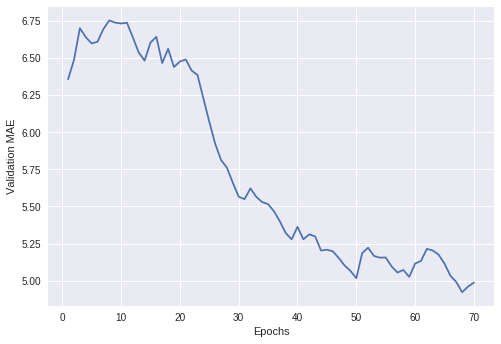

In [23]:
import matplotlib.pyplot as plt

def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
      
  return smoothed_points


smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Training the final model

In [24]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print('test_mse_score:', test_mse_score)
print('test_mae_score:', test_mae_score)

102/102 [==============================] - 0s 242us/step
test_mse_score: 40.12932048124426
test_mae_score: 4.738150129131243
